In [1]:
# ACP
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Regression Logistique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# K-means
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix, accuracy_score

import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Standardisation des données
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# PCA
from sklearn.decomposition import PCA

# K-Means
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

# Score des silhouettes
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import silhouette_score, adjusted_rand_score
# + le score des silhouettes est élevé + les clusters sont éloignés

In [2]:
df_final = pd.read_csv("df_final.csv")
df_final.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


### <font color="deepskyblue">5. ANALYSE EN COMPOSANTES PRINCIPALES</font>

<font color="deepskyblue">5.1 Standardisation des données numériques</font>

In [3]:
df_final = df_final.set_index("is_genuine")
df_final.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
1,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
1,172.69,104.48,103.50,4.40,2.94,113.16
1,171.36,103.91,103.94,3.62,3.01,113.51
1,171.73,104.28,103.46,4.04,3.48,112.54


#### Sélection des variables numériques

In [4]:
X = df_final.values
X[:5]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54]])

In [5]:
X.shape

(1500, 6)

### Variable cible

In [6]:
is_genuine = df_final.index
len(is_genuine)

1500

In [7]:
is_genuine

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int64', name='is_genuine', length=1500)

### Features

In [8]:
features = df_final.columns
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

### Normalisation des données

##### X_norm (dataset normalisé)

In [9]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[-0.48653957,  2.77412327,  3.16324041,  0.05552293, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08209165, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.1264954 , -0.91256208,
         0.55190114],
       [-1.96149786, -0.39929381,  0.06049835, -1.30961456, -0.61049399,
         0.95307539],
       [-0.74875438,  0.83666863, -1.41407214, -0.6725504 ,  1.41767746,
        -0.15875038]])

In [10]:
idx = ["mean", "std"]

pd.DataFrame(X_norm).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [299]:
n_components=2
pca = PCA(n_components=n_components)
df_pca = pca.fit(X_norm)
df_pca

PCA(n_components=2)

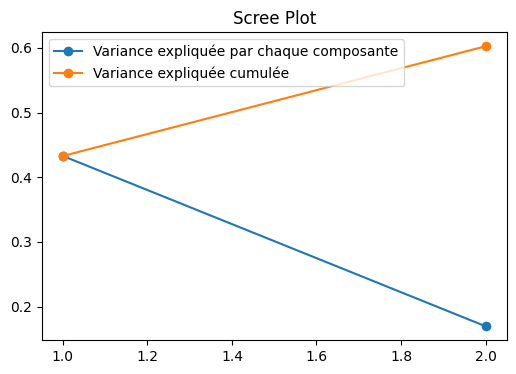

In [300]:
# Calculer la variance expliquée + variance expliquée cumulée
explained_variance = df_pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot (éboulis) avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
#plt.xlabel('nb PC')
#plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

In [301]:
scree = (df_pca.explained_variance_ratio_ * 100).round(2)
scree_cum = (df_pca.explained_variance_ratio_.cumsum() * 100).round(2)

print(f'Variance expliquée : {scree}')
print(f'Variance expliquée cumulée :{scree_cum}')

Variance expliquée : [43.29 16.96]
Variance expliquée cumulée :[43.29 60.24]


<font color="coral">

- la 1ère composante capte 43% de la variance de nos données initiales

- => 60% de la variance des données est expliquée par les 2 premières composantes et 85% de la variance par les 4 premières composantes.

</font>

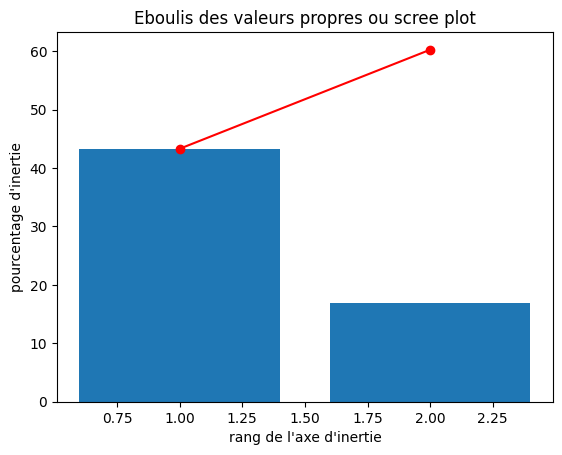

In [303]:
# nous mettons nos 2 composantes principales dans une liste
n_components = 2
x_list = range(1, n_components+1)
list(x_list)

# affichage du diagramme d'éboulis des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l\'axe d\'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres ou scree plot")
plt.show(block=False)

In [304]:
pcs = df_pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084836,0.330573,0.393608,0.507659,0.439445,-0.527037
1,0.941141,0.307847,0.108558,-0.072996,-0.004670,0.048466


In [305]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.00,0.05


In [306]:
pcs.T

,F1,F2
diagonal,-0.084836,0.941141
height_left,0.330573,0.307847
height_right,0.393608,0.108558
margin_low,0.507659,-0.072996
margin_up,0.439445,-0.004670
length,-0.527037,0.048466


<Axes: >

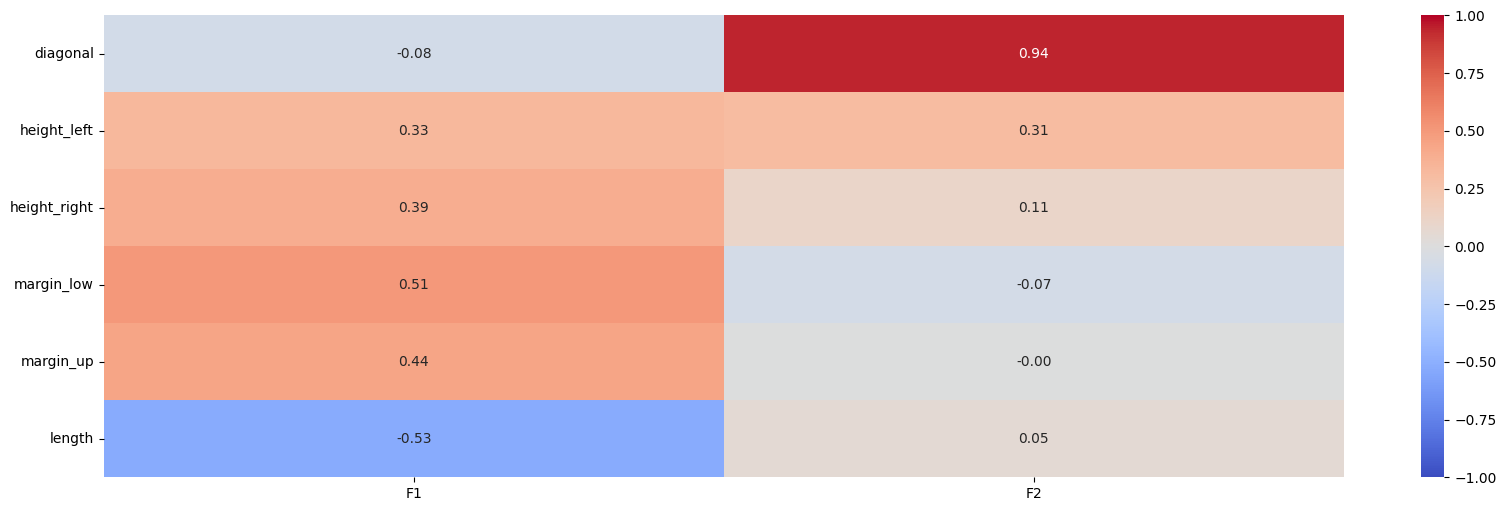

In [307]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### Cercle des corrélations

In [308]:
def correlation_graph(df_pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, df_pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                df_pca.components_[x, i],  
                df_pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(df_pca.components_[x, i] + 0.05,
                df_pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*df_pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*df_pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [309]:
x_y = (0,1)
x_y

(0, 1)

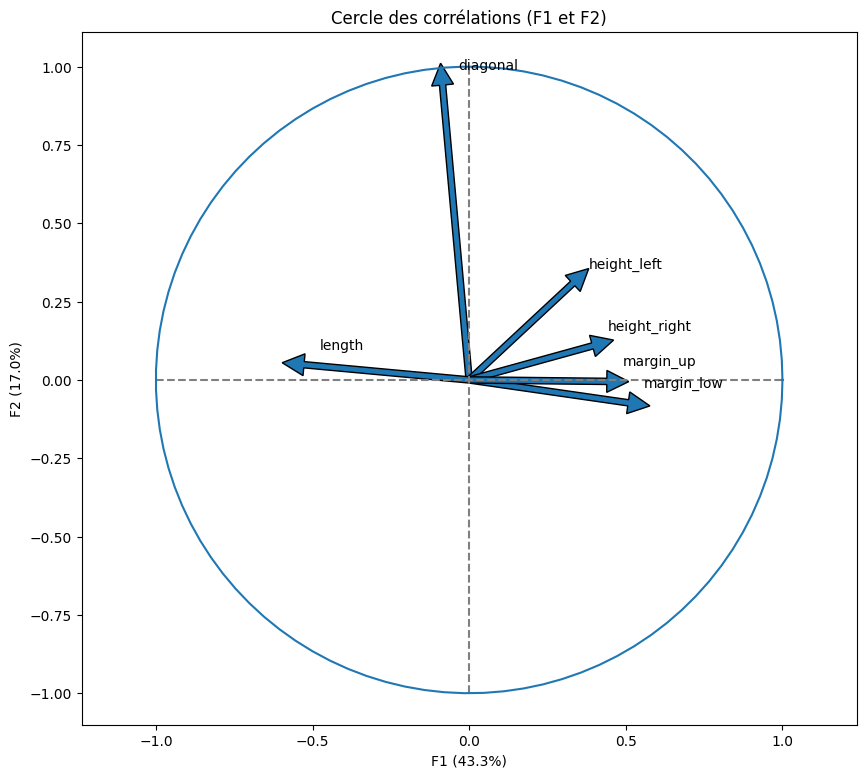

In [310]:
correlation_graph(df_pca, x_y, features)

**Lecture du cercle des corrélations**

Les variables les mieux représentées sont 'diagonal','length', 'margin_low' et 'margin_up' : nous obtenons un coefficient de corrélation d'au moins 0.5 avec nos 2 premiers axes principaux.
___

- Corrélation négative de la variable length sur le 1er axe principale
- Corrélation positive des variables margin_low et margin_up sur le 1er axe principale
- Corrélation positive de la variable diagonale avec notre 2ème composante principale

### Projection

In [311]:
X_proj = df_pca.transform(X_norm)
X_proj[:5]

array([[ 1.64423129,  0.74913167],
       [-2.01961846, -2.20778776],
       [-0.97032292,  2.61999912],
       [-1.37719988, -1.81775965],
       [ 0.14874304, -0.56584768]])

In [312]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'bright')
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

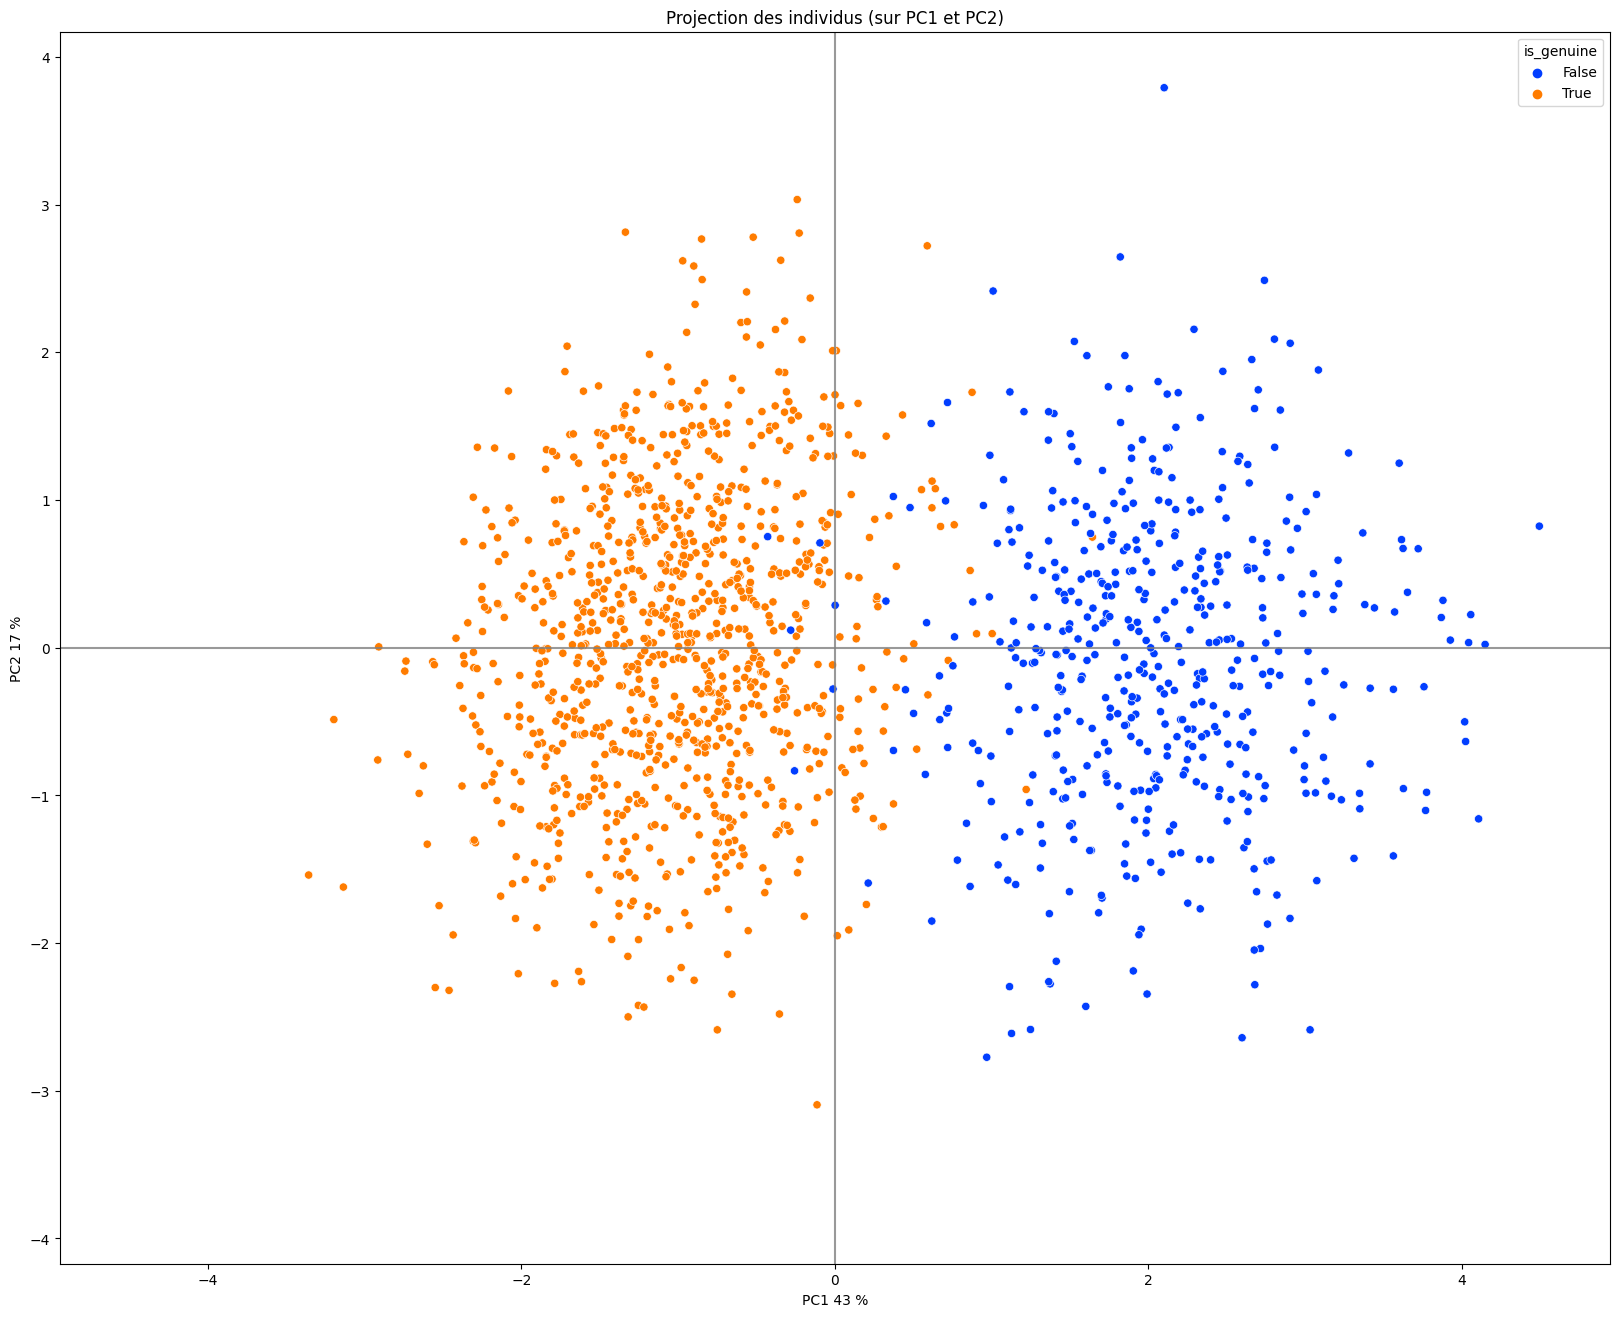

In [313]:
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=df_final.index, marker="o")

On constate que l'on distingue bien nos 2 groupes (vrai billets et faux billets) sur nos 2 premières composantes !
___
- Les vrais billets se concentrent sur le coté gauche
- Les faux billets se concentrent sur le coté droit
- Nous voyons une zone "d'incertitude" qui est la zone de contact entre les 2 groupes
___
Les billets sont mieux distingués via leur longueur (length), car c'est cette variable qui est la mieux représentée sur l'axe des abscisses !

#******************************************* END ACP 

## Classification supervisée

### K-means

## ----------------------------------------------

---------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <font color="deepskyblue"> 2. Regression Logistique</font>

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import statsmodels.formula.api as smf

In [72]:
rl = df_final.copy()
rl.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
1,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
1,172.69,104.48,103.50,4.40,2.94,113.16
1,171.36,103.91,103.94,3.62,3.01,113.51
1,171.73,104.28,103.46,4.04,3.48,112.54


In [73]:
rl = rl.reset_index('is_genuine')

In [74]:
# include all variables
X = rl[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values
y = rl[['is_genuine']]

banknote = rl.columns.drop('is_genuine')

In [75]:
X.shape

(1500, 6)

In [76]:
y.head()

,is_genuine
0,1
1,1
2,1
3,1
4,1


In [77]:
banknote

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

- Split, train, test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme {y_train.shape}")
unique_yt, counts_yt = np.unique(y_train, return_counts=True)
print("True/False mix in training set:\n", np.asarray((unique_yt, counts_yt)).T)
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme {y_test.shape}")
unique_ytt, counts_ytt = np.unique(y_test, return_counts=True)
print("True/False mix in testing set:\n", np.asarray((unique_ytt, counts_ytt)).T)

Nous avons X_train de forme (1200, 6) et y_train de forme (1200, 1)
True/False mix in training set:
 [[  0 390]
 [  1 810]]
Nous avons X_test de forme (300, 6) et y_test de forme (300, 1)
True/False mix in testing set:
 [[  0 110]
 [  1 190]]


<font color="lightblue">

Comme notre jeu de données a 1500 échantillons et que l'on en réserve 20 % pour le test, on aura les tailles suivantes : X.shape()  et  y.shape()

Pour t = 0,2

- X_train: 1200 * 6

- X_test: 300 * 6

- y_train: 1200 * 1

- y_test: 300 * 1

</font>

- Enregistrement de nos jeux de test et d'entrainement pour ré-utilisation pour notre modèle de régression logistique

In [80]:
# export training & testing sets to re-use for training logistic regression model
pd.DataFrame(X_train, columns=banknote).to_csv('X_train.csv', index=None)
y_train.to_csv('y_train.csv', index=False)
pd.DataFrame(X_test, columns=banknote).to_csv('X_test.csv', index=None)
y_test.to_csv('y_test.csv', index=False)

In [81]:
# center & reduce data
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(X_train)

- Initialisation et entrainement

In [82]:
clf = LogisticRegression(random_state=808).fit(X_train, y_train)

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
# Coef des variables
temp_coef = pd.DataFrame(clf.coef_[0], index=banknote, columns=['coef'])
print(temp_coef)

                  coef
diagonal     -0.291817
height_left  -1.460221
height_right -1.985041
margin_low   -3.319429
margin_up    -3.002789
length        3.870290


Ici le coefficient nous permet de savoir quelles variables sont le plus significatives pour la prédiction des résultats !
___
- Les 3 variables les plus significatives sont "length", "margin_low" et "margin_up"
- La variable la moins significative est "diagonal"

- Prédictions d'échantillons

In [84]:
X.shape

(1500, 6)

In [85]:
# Prediction d'un échantillon
print("Prédiction",clf.predict([x_train_scaled[8, :]])[0])

print("Probabilité",clf.predict_proba([x_train_scaled[8, :]])[0][0])

Prédiction 1
Probabilité 0.0099838586953378


on obtient True avec une probabilité de 0.99%

In [86]:
# Prediction d'un échantillon
print("Prédiction",clf.predict([x_train_scaled[89, :]])[0])

print("Probabilité",clf.predict_proba([x_train_scaled[89, :]])[0][1])

Prédiction 0
Probabilité 0.005193715358715791


on obtient False avec une probabilité de 0.5%

In [87]:
# Prediction d'un autre échantillon
print("Prédiction",clf.predict([x_train_scaled[13, :]])[0])

print("Probabilité",clf.predict_proba([x_train_scaled[13, :]])[0][1])

Prédiction 1
Probabilité 0.9998171248970038


on obtient True avec une probabilité de 99.98%

- Histogramme des probabilités des prédictions

<Axes: ylabel='Count'>

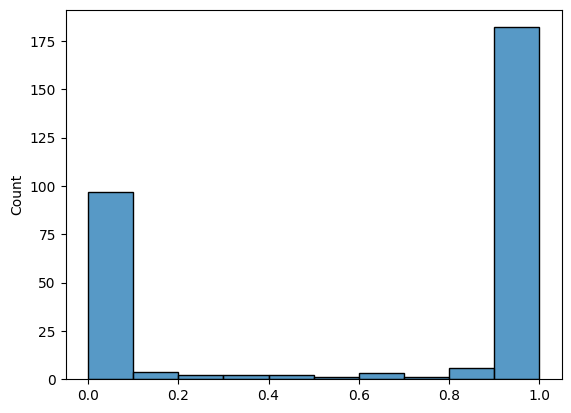

In [88]:
y_hat_proba = clf.predict_proba(X_test)[:,1]
sns.histplot(y_hat_proba)

Notre modèle est assez confiant de ses prédictions, la plupart des prédictions ont une probabilité proche de 0 ou de 1

- Accuracy

In [89]:
# predictions 
y_pred = clf.predict(X_test)

print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.99


Notre modèle a une efficacité de 99%, ce qui est une trés belle performance ! 

- Matrice de confusion

In [90]:
confusion_matrix(y_test, y_pred)

array([[107,   3],
       [  0, 190]], dtype=int64)

- Seuil de séparation des classes

comparons la matrice de confusion pour différents seuils de classification

In [91]:
# Probabilité de la classe 1
y_hat_proba = clf.predict_proba(X_test)[:,1]

In [92]:
# classes prédites pour les  seuils 0.3 et 0.7

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ]

In [93]:
# Matrice de confusion pour le seuil 0.3
confusion_matrix(y_test, y_pred_03)

array([[103,   7],
       [  0, 190]], dtype=int64)

<font color="lightgreen">

Nous obtenons un excellent résultat !

seuil = 30%

Nous obtenons 0 faux négatifs et 7 faux positif !

</font>

In [94]:
# Matrice de confusion pour le seuil 0.7

confusion_matrix(y_test, y_pred_07)

array([[109,   1],
       [  2, 188]], dtype=int64)

<font color="lightgreen">

Nous obtenons un excellent résultat !

seuil = 70%

Nous obtenons 2 faux négatifs et 1 faux positif !

</font>

- Autres Métriques :

    - Precision, Recall, et ROC_AUC

In [95]:
# Rapport de classification

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [50]:
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Precision: 0.9844559585492227
Recall: 1.0
ROC-AUC 0.9996650717703349


<font color="lightblue">

- Les scores des mesures d'évaluation de la performance de notre modèle de classification binaire sont excellents ! 

    - Precision : 98.4% des prédictions positives faites par le modèle sont correctes.

    - Rappel : 100% des vrais positifs dans les données sont identifiés par notre modèle !

    - ROC-AUC de 99,9% indique une excellente capacité de discrimination entre les classes positives et négatives.

</font>

- Courbe ROC => Graphique de la sensibilité (taux de vrais positifs) par rapport à la spécificité (taux de faux positifs) pour différents seuils de classification

    - l'aire sous la courbe est extrêmement proche de 1, ce qui indique que notre modèle a une capacité parfaite à distinguer les billets vrais et les billets faux.

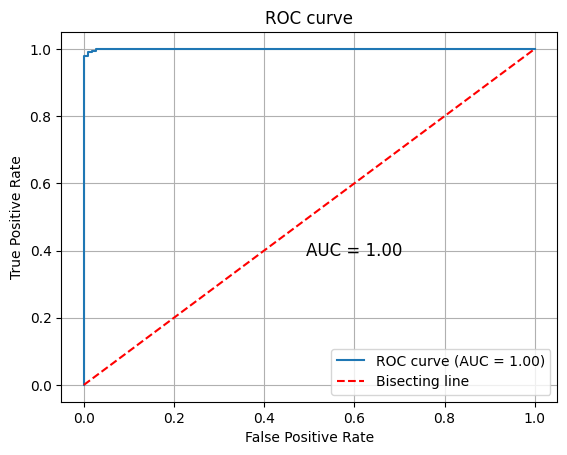

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming clf is your classifier, X_test is your test data, and y_test is your test labels
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Calcul de l'AUC
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Tracer la courbe ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')

# Tracer la bissectrice en rouge
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Bisecting line')

# Ajout des indicateurs
plt.text(0.6, 0.4, f'AUC = {auc:.2f}', fontsize=12, ha='center', va='center')

# Personnalisation du graphique
plt.grid()
plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


----------------- Fin régression Logistique --------------------------------

<font color="deepskyblue">

## 3. Clustering & analyse des centroides avec K-means

</font>

#### 3.1 Visualisation

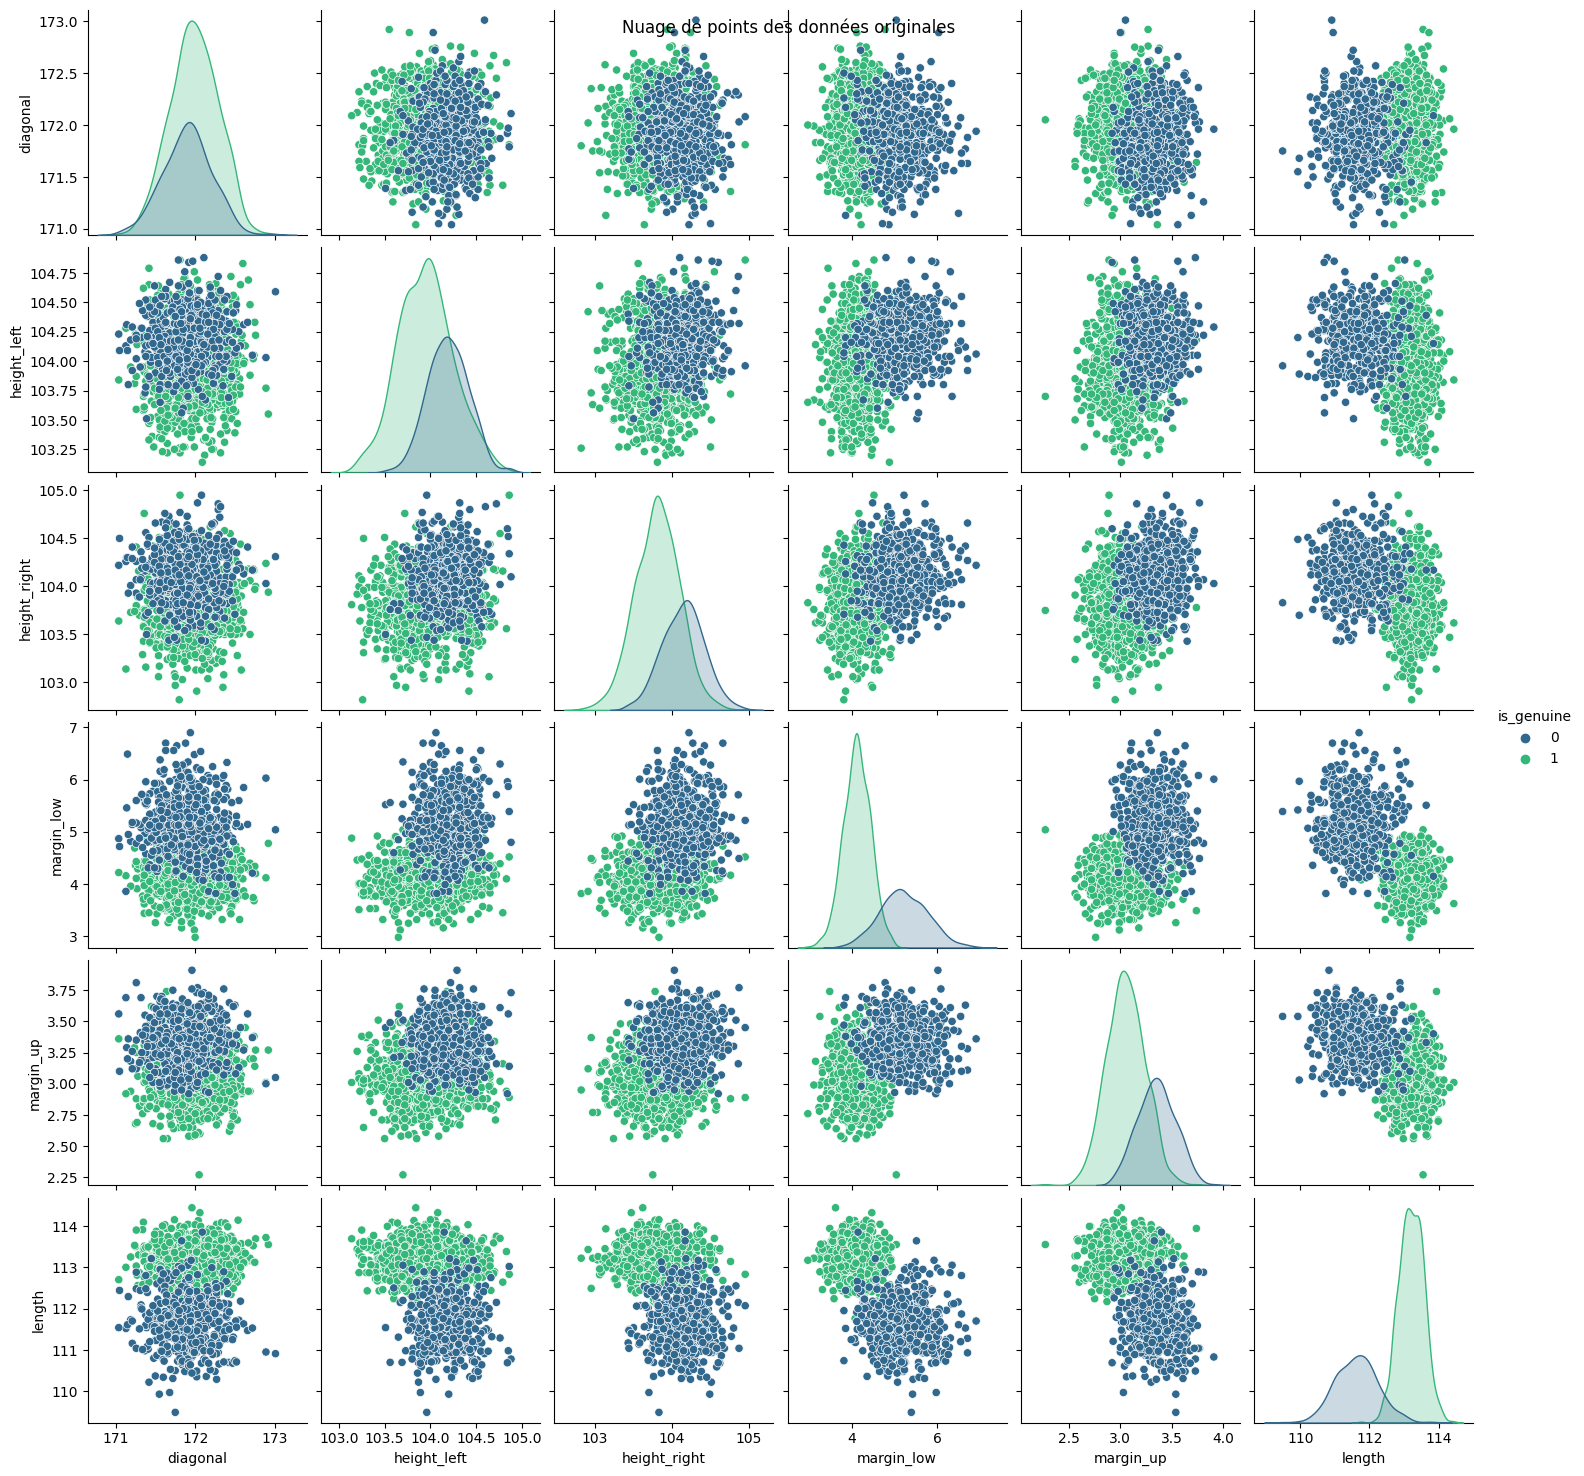

In [97]:
# Visualisation avec Seaborn
sns.pairplot(rl, hue='is_genuine', palette='viridis')
plt.suptitle('Nuage de points des données originales')
plt.show()




#### 3.2 Création d'un dataframe "clustering" à partir du jeu d'entrainement "y_train" de notre régression logistique

- dimensions : 1200 lignes et 6 colonnes

- données : normalisées



In [98]:
clustering = pd.DataFrame(y_train)
clustering[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
          'length']] = x_train_scaled
clustering['is_genuine'].value_counts()

is_genuine
1    810
0    390
Name: count, dtype: int64

- 2 clusters se distinguent dans la relation margin_low et length

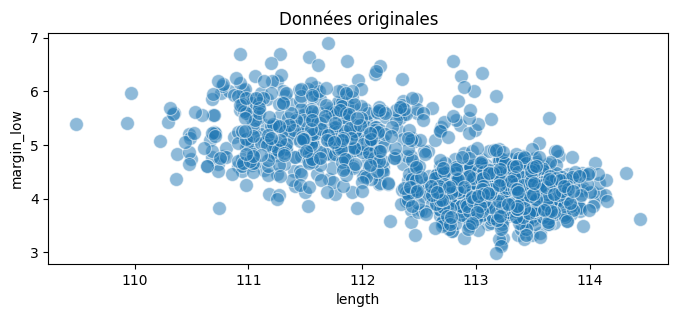

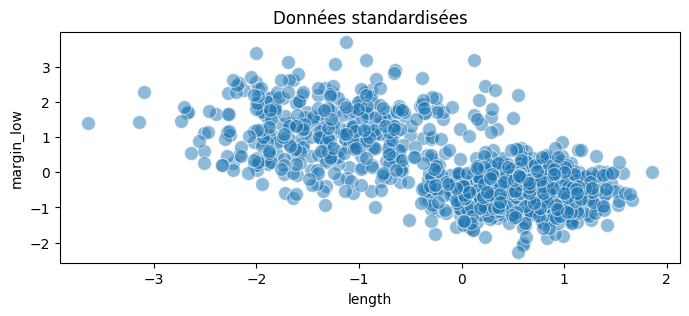

In [99]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=rl, x='length', y='margin_low', s=100, alpha=.5)
plt.title('Données originales')
plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=clustering, x='length', y='margin_low', s=100, alpha=.5)
plt.title('Données standardisées')
plt.show()

=> la répartition entre données originales et données normalisées est trés semblable.

In [100]:
clustering = clustering.set_index('is_genuine')
clustering.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
1,1.050853,1.958416,-0.367712,-0.597273,-0.306118,0.648529
1,-0.185700,1.559864,-1.317963,-0.597273,-1.428167,0.921625
0,-1.064303,0.995247,2.115204,0.618912,0.859087,-0.603164
0,0.334954,0.829184,1.195606,1.728680,0.513841,-1.229011
1,0.465117,1.294162,-0.980777,-0.445250,-1.126077,0.716803


### 3.3 Calculer k optimal du KMeans

- On utilise 3 méthodes pour trouver le nombre de cluster optimal :

    - la méthode du coude
    
    - le score silhouette

    - Indice Davies-Bouldin


a) Méthode du coude

In [144]:
# liste vide pour stocker nos inertie et score
inertia = []
sil_score = []

In [145]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester
k_list = range(1, 10)

# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in k_list :
  k_means = KMeans(n_clusters=i, n_init='auto')
  k_means.fit(X_norm) 
  inertia.append(k_means.inertia_)


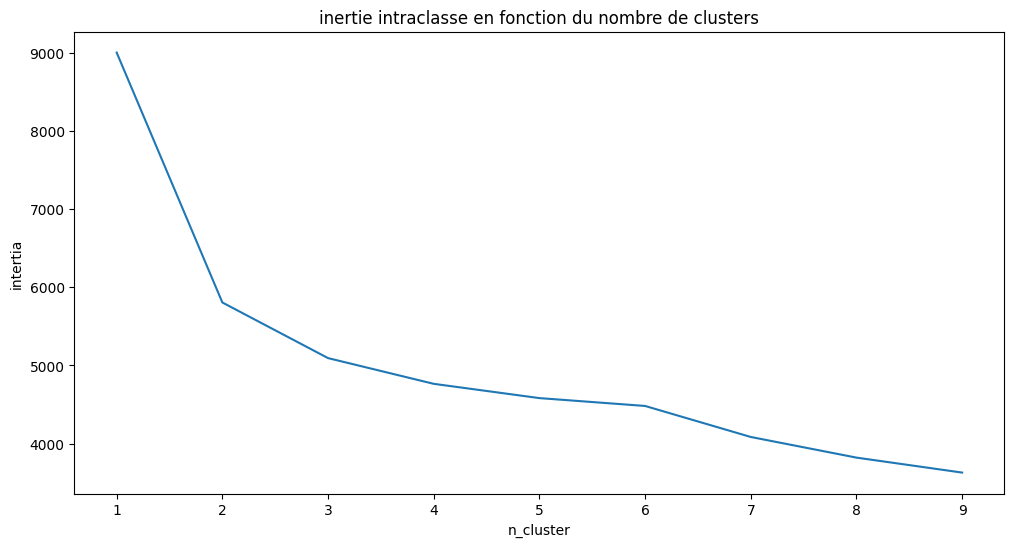

In [147]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

In [148]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester
ks_list = range(2, 10)

# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in ks_list :
  k_means = KMeans(n_clusters=i, n_init=10)
  k_means.fit(X_norm) 
  sil_score.append(silhouette_score(X_norm, k_means.labels_))

In [149]:
print(f"l'inertie : ", inertia)
print(f"silhouette score: ", sil_score)

l'inertie :  [9000.0, 5805.025992488069, 5093.966498136899, 4765.112705541479, 4582.541918890093, 4482.198935221706, 4085.6712650030477, 3821.736656257293, 3630.392487569755]
silhouette score:  [0.3427417097717482, 0.21041919210829058, 0.19641918199912706, 0.15653414937149215, 0.1503418853402444, 0.14583183310789546, 0.14433764676830463, 0.14284402763719428]


b) Silhouette score


n_clusters 2
score k-means -5805.026596797184
silhouette_score:  0.3425575415231918

n_clusters 3
score k-means -5103.148636675269
silhouette_score:  0.20935293849488237

n_clusters 4
score k-means -4680.252849217826
silhouette_score:  0.19574877528564172

n_clusters 5
score k-means -4360.200851965393
silhouette_score:  0.15685773528927915

n_clusters 6
score k-means -4185.443546205042
silhouette_score:  0.15319517912057729

n_clusters 7
score k-means -3962.0409717483435
silhouette_score:  0.14343331821222857


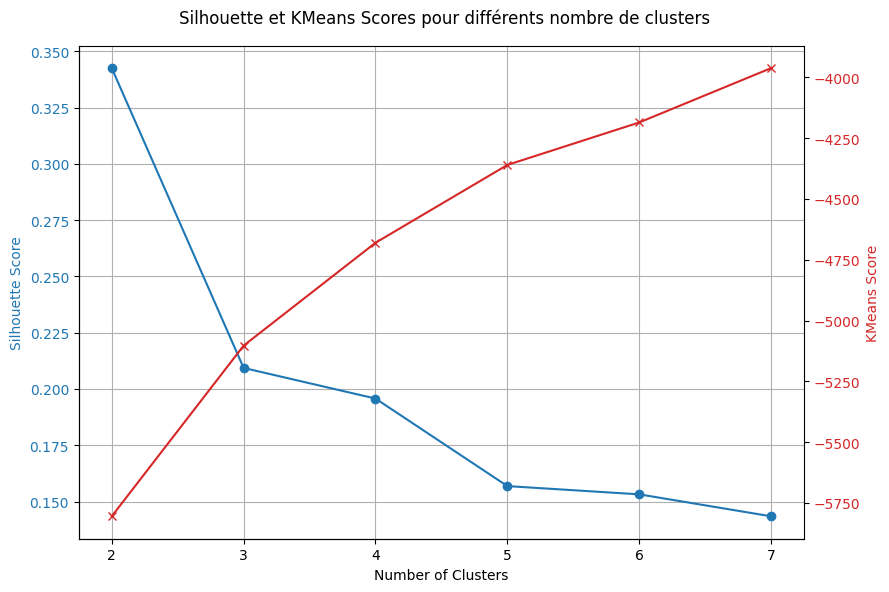

In [150]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X_norm is already defined and preprocessed

silhouette_scores = []
kmeans_scores = []

# Loop over the range of clusters to evaluate KMeans
for n_clusters in range(2, 8):
    print()
    print("n_clusters", n_clusters)
    
    k_means = KMeans(init="k-means++", n_clusters=n_clusters, random_state=808, n_init='auto')
    k_means.fit(X_norm)
    
    score = k_means.score(X_norm)
    print("score k-means", score)
    
    k_means_labels = k_means.predict(X_norm)
    silhouette_avg = silhouette_score(X_norm, k_means_labels)
    print("silhouette_score: ", silhouette_avg)
    
    silhouette_scores.append(silhouette_avg)
    kmeans_scores.append(score)

# Plotting silhouette scores and KMeans scores
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plotting silhouette scores
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(range(2, 8), silhouette_scores, marker='o', color=color, label='Silhouette Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid()

# Creating a second y-axis for KMeans scores
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('KMeans Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2, 8), kmeans_scores, marker='x', color=color, label='KMeans Score')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout adjustments
fig.suptitle('Silhouette et KMeans Scores pour différents nombre de clusters')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


<font color='lightblue'>Le choix optimal du nombre de clusters est souvent un équilibre entre avoir un silhouette score élevé et une inertie plus faible. Cependant, des silhouette scores significativement plus bas indiquent une moins bonne séparation des clusters.

Sélection : 

### n_clusters = 2 

car :

Il a le meilleur silhouette score (0.3426), indiquant des clusters bien définis.
Bien que l'inertie soit plus élevée par rapport aux autres options, le compromis sur la qualité des clusters est mieux respecté avec un score de silhouette plus élevé.


Alternative possible : n_clusters = 3 pour une légère amélioration de la réduction de l'inertie, mais avec un silhouette score encore raisonnablement bon (0.2094). 
Néanmoins, on note que la qualité des clusters commence à diminuer plus rapidement à partir de ce point.

### En résumé, n_clusters = 2 offre la meilleure qualité de clustering selon le silhouette score, malgré une inertie plus élevée.</font>

### Prédire : y

data = df_final

In [211]:
target = df_final['is_genuine']

# Transformer les valeurs de y
target = target.replace({1: True, 0: False})

target


0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1500, dtype: bool

#### Séparation des données d'entrainement et des données test !

In [212]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_norm, target, test_size=0.2, random_state=808)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1200 lignes 
y_train : 1200 lignes 
X_test : 300 lignes 
y_test : 300 lignes


### K-means sur notre jeu d'entrainement

In [213]:
# On définit le nombre de cluster à 2 et on entraine !

k_means = sk.cluster.KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train, y_train)

In [214]:
# Prédictions sur l'échantillon-test

y_kmean = k_means.predict(X_test)
y_kmean[:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [215]:
y_test

480      True
141      True
103      True
1499    False
787      True
        ...  
92       True
1055    False
1330    False
330      True
208      True
Name: is_genuine, Length: 300, dtype: bool

In [216]:
y_test = y_test.replace([False, True], [0, 1]).reset_index()
#y_test = pd.DataFrame(y_test)
y_test

,index,is_genuine
0,480,1
1,141,1
2,103,1
3,1499,0
4,787,1
...,...,...
295,92,1
296,1055,0
297,1330,0
298,330,1


In [217]:
ytest = y_test['is_genuine']
ytest

0      1
1      1
2      1
3      0
4      1
      ..
295    1
296    0
297    0
298    1
299    1
Name: is_genuine, Length: 300, dtype: int64

In [218]:
data_acp_kmeans = pca.fit_transform(X_test)
df_acp_kmeans = pd.DataFrame(data_acp_kmeans)
df_acp_kmeans.rename(columns = {0:'PC1',1:'PC2',2:'PC3',3:"PC4"}, inplace = True)
# Sélectionner uniquement les colonnes PC1 et PC2
df_acp_kmeans = df_acp_kmeans[['PC1', 'PC2']]

df_acp_kmeans


,PC1,PC2
0,-2.433005,-0.215682
1,0.106468,-1.211441
2,-0.908570,0.388378
3,0.923689,-1.462388
4,-0.748761,0.834227
...,...,...
295,-1.258090,-0.312323
296,1.918895,-0.744672
297,2.169851,-0.098839
298,-0.798765,0.350215


Création du dataframe avec les clusters du K-means

In [219]:
# Dataframe du K-Means

df_kmeans = df_acp_kmeans
df_kmeans['cluster'] = y_kmean
df_kmeans

,PC1,PC2,cluster
0,-2.433005,-0.215682,1
1,0.106468,-1.211441,1
2,-0.908570,0.388378,1
3,0.923689,-1.462388,0
4,-0.748761,0.834227,1
...,...,...,...
295,-1.258090,-0.312323,1
296,1.918895,-0.744672,0
297,2.169851,-0.098839,0
298,-0.798765,0.350215,1


Création du dataframe des centroïdes pour projection des clusters du K-means

In [220]:
df_centroide_kmeans = df_kmeans.groupby('cluster').mean()
df_centroide_kmeans = df_centroide_kmeans.reset_index()
df_centroide_kmeans['cluster'] = df_centroide_kmeans['cluster'].replace([0, 1], 'centroide')
df_centroide_kmeans

,cluster,PC1,PC2
0,centroide,1.910581,-0.142283
1,centroide,-1.090332,0.081198


Concaténation des 2 dataframes

In [221]:
df_kmeans = pd.concat([df_kmeans, df_centroide_kmeans], ignore_index = True)
df_kmeans

,PC1,PC2,cluster
0,-2.433005,-0.215682,1
1,0.106468,-1.211441,1
2,-0.908570,0.388378,1
3,0.923689,-1.462388,0
4,-0.748761,0.834227,1
...,...,...,...
297,2.169851,-0.098839,0
298,-0.798765,0.350215,1
299,-0.505961,-1.259244,1
300,1.910581,-0.142283,centroide


Nouvelle projection des billets sur PC1 et PC2

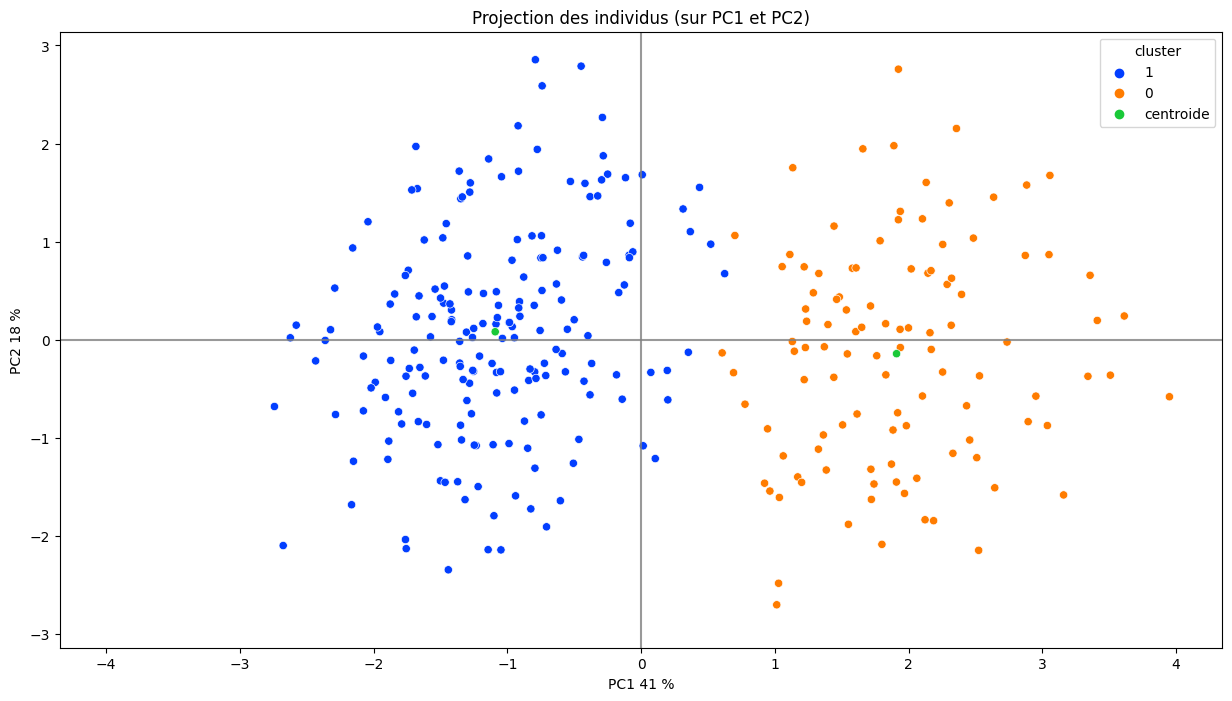

In [222]:
x_y = [0,1]
display_factorial_planes(df_kmeans, x_y, pca, figsize=(15,8), clusters=df_kmeans.cluster, marker="o")

On distingue mieux nos 2 groupes sur nos 2 premières composantes !
___
- Les centroides crée par le K-Means sont proches de ceux des données d'origines
- Les groupes sont très similaires à ceux des données d'origines
- La zone "d'incertitude" n'éxiste plus ! On voit une limite entre les 2 groupes !

-------------------------------------

#### Suppression des centroïdes pour comparer les partitionnements des données d'origines aux clusters crées par le K-means


In [224]:
df_kmeans.drop(df_kmeans.loc[df_kmeans['cluster']=='centroide'].index, inplace=True)

In [226]:
df_kmeans['is_genuine'] = ytest
df_kmeans

,PC1,PC2,cluster,is_genuine
0,-2.433005,-0.215682,1,1
1,0.106468,-1.211441,1,1
2,-0.908570,0.388378,1,1
3,0.923689,-1.462388,0,0
4,-0.748761,0.834227,1,1
...,...,...,...,...
295,-1.258090,-0.312323,1,1
296,1.918895,-0.744672,0,0
297,2.169851,-0.098839,0,0
298,-0.798765,0.350215,1,1


In [228]:
def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)

In [232]:
df_kmeans['cluster'] = df_kmeans['cluster'].astype(int)

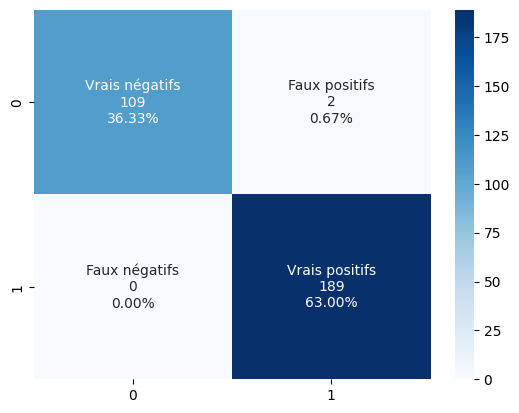

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       111
           1       0.99      1.00      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [233]:
matrice_confusion(df_kmeans['is_genuine'], df_kmeans['cluster'], 'kmeans_matrice-confusion')

_____________

<font color="lightblue">La matrice de confusion nous donne les performances de classification du K-Means sur le jeu de test

- 298 billets sur 300 billets au total ont été bien classés ! 

<strong>Excellent résultats 👍!</strong>
___
Exactitude élevée (accuracy) : Une exactitude de 99% montre que le modèle est globalement très précis, faisant seulement 1% d'erreurs sur l'ensemble de test.</font>

------------------------------------------------------------

## <font color="coral">Régression Logistique</font>

In [255]:
# Transformer les valeurs de la colonne is_genuine
df_final['is_genuine'] = df_final['is_genuine'].replace({1: True, 0: False})

# Afficher le DataFrame modifié
df_final.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [256]:
# y est la variable à prédire !
target = df_final['is_genuine']
#print(target)
# Création du Train_set et du Test_set

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X_norm, target, test_size=0.3, random_state=42)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1050 lignes 
y_train : 1050 lignes 
X_test : 450 lignes 
y_test : 450 lignes


- environs 2/3 des données pour l'entrainement
- environs 1/3 des données pour le test

Entrainement de notre modèle sur le set d'entrainement

In [257]:
regression = sk.linear_model.LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

In [258]:
# Coef des variables
temp_coef = pd.DataFrame(regression.coef_[0], index=banknote, columns=['coef'])
print(temp_coef)

                  coef
diagonal      0.054052
height_left  -0.578793
height_right -0.688850
margin_low   -2.482127
margin_up    -1.489130
length        3.385925


- Les 3 variables les plus significatives sont "length", "margin_low" et "margin_up"
- La variable la moins significative est "diagonal"

#### Prédictions sur l'échantillon-test

In [259]:
y_log = regression.predict(X_test)
y_log[:5]

array([False, False,  True,  True,  True])

#### Dataframe du résultat de la probabilité

In [260]:
proba_result = pd.DataFrame(regression.predict_proba(X_test)).rename(columns={0: 'False', 1: 'True'})
proba_result

,False,True
0,0.999302,0.000698
1,0.997689,0.002311
2,0.001265,0.998735
3,0.002837,0.997163
4,0.000191,0.999809
...,...,...
445,0.187390,0.812610
446,0.000077,0.999923
447,0.002386,0.997614
448,0.998359,0.001641


<Axes: ylabel='Count'>

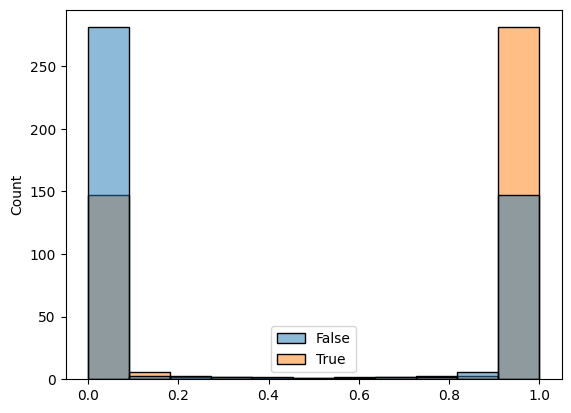

In [281]:
#y_hat_proba = regression.predict_proba(X_test)[:,1]
sns.histplot(proba_result)

In [279]:
# Billets dont la probabilité est située entre un seuil de 10% et 90% d'être Vrais
billets_confu = proba_result.loc[(proba_result['True'] > 0.10) & (proba_result['True'] < 0.90)]
billets_confu

,False,True
22,0.399708,0.600292
26,0.786865,0.213135
29,0.647063,0.352937
100,0.190503,0.809497
103,0.628405,0.371595
162,0.783973,0.216027
188,0.231270,0.768730
192,0.640475,0.359525
222,0.287672,0.712328
230,0.835994,0.164006


La régression logistique nous permet d'avoir pour chaque billet, les probabilités que le billet soit vrai ou faux

### <font color="deepskyblue">Performance de notre modèle de classification !</font>

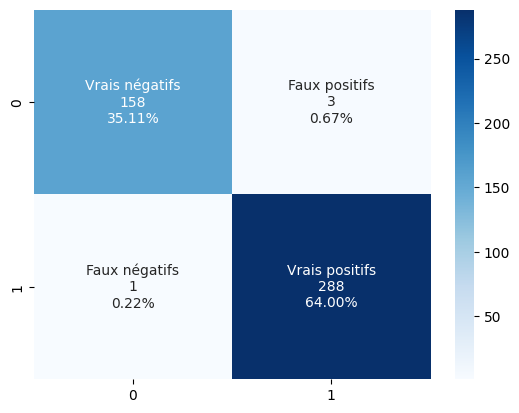

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       161
        True       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [268]:
matrice_confusion(y_test, y_log, 'reg_matrice-confusion')

_Accuracy_ : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.
___
**Accuracy : 99% de prédictions correctes !**

- Score de 288 sur 289 billets vrais identifiés comme vrais positifs !
- Score de 158 billets sur 161 billets faux identifiés comme vrais négatifs !

Nous obtenons une précision de 99% et un rappel de 98% sur les faux billets. 

#### Autres scores pour comparer notre modèle sur différents seuils

In [284]:
# classes prédites pour les  seuils 0.2, 0.3 et 0.7
y_pred_02 = [0 if value < 0.2 else 1 for value in y_hat_proba]
y_pred_03 = [0 if value < 0.3 else 1 for value in y_hat_proba]
y_pred_05 = [0 if value < 0.5 else 1 for value in y_hat_proba]
y_pred_07 = [0 if value < 0.7 else 1 for value in y_hat_proba]

# Matrice de confusion pour les différents seuils définis
print(f"seuil de 20% : ", confusion_matrix(y_test, y_pred_02))
print("\n")
print(f"seuil de 30% : ", confusion_matrix(y_test, y_pred_03))
print("\n")
print(f"seuil de 50% : ", confusion_matrix(y_test, y_pred_05))
print("\n")
print(f"seuil de 70% : ", confusion_matrix(y_test, y_pred_07))


seuil de 20% :  [[153   8]
 [  0 289]]


seuil de 30% :  [[155   6]
 [  0 289]]


seuil de 50% :  [[158   3]
 [  1 288]]


seuil de 70% :  [[159   2]
 [  3 286]]


<font color="lightgreen">

Pour la détection de faux billets de banque, il est crucial de minimiser les faux négatifs car laisser passer un faux billet a des conséquences graves. Cela implique d'utiliser un seuil plus bas, tel que 20% ou 30%, car ces seuils n'ont aucun faux négatif.

Seuil de 20% ou 30% est recommandé :
Ces seuils garantissent que tous les faux billets sont détectés.
Bien que cela introduise quelques faux positifs, cela peut être acceptable dans un contexte où la priorité est de ne pas laisser passer de faux billets.

  
</font>

Courbe de ROC

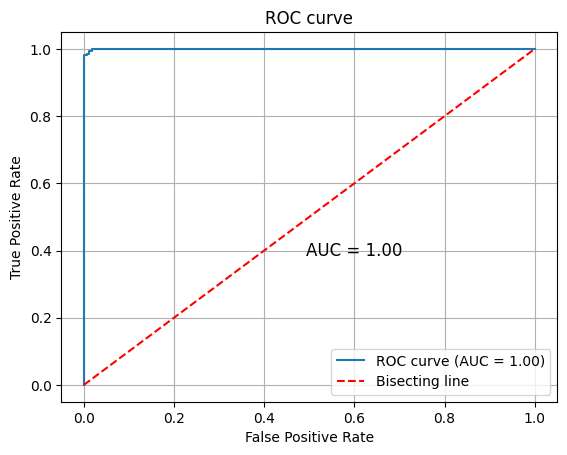

In [274]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming clf is your classifier, X_test is your test data, and y_test is your test labels
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, regression.predict_proba(X_test)[:, 1])

# Calcul de l'AUC
auc = roc_auc_score(y_test, regression.predict_proba(X_test)[:, 1])

# Tracer la courbe ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')

# Tracer la bissectrice en rouge
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Bisecting line')

# Ajout des indicateurs
plt.text(0.6, 0.4, f'AUC = {auc:.2f}', fontsize=12, ha='center', va='center')

# Personnalisation du graphique
plt.grid()
plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [285]:
from sklearn.feature_selection import RFECV

# Recursive Feature Elimination

sel = RFECV(estimator = regression,cv=10, scoring = 'accuracy')
sel.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [287]:
cv_res = pd.DataFrame(sel.cv_results_)

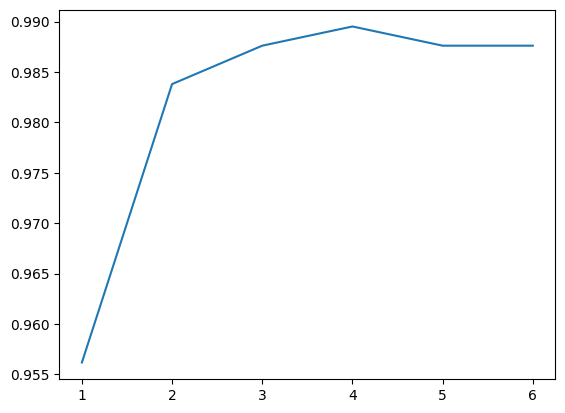

4
Index(['height_right', 'margin_low', 'margin_up', 'length'], dtype='object')


In [288]:
plt.plot(np.arange(1,7,1),cv_res['mean_test_score'])
plt.show()
print(sel.n_features_)
print(df_final.columns[sel.support_])

Choix du modele !!!
---

**La régression logistique est la solution qui apporte les meilleurs résultats !**

** ******* FIN ANALYSE *** **

# <font color="lightgreen">Programme de détection des faux billets</font>

In [370]:
# Import data
data_prod = pd.read_csv("billets_production.csv")

# check for missing values
if (data_prod.loc[data_prod.isna().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs manquantes !!!")
else:
    print ("Pas de valeurs manquantes.")
# check for missing data
if (data_prod.loc[data_prod.isnull().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs nulles !!! ")
else:
    print ("Pas de valeurs nulles.")
# check for duplicates
if (data_prod.loc[data_prod.duplicated() == True].shape[0]) != 0:
    print("!!! Doublons dans la table !!!")
else:
    print ("Pas de doublons dans la table.")

Pas de valeurs manquantes.
Pas de valeurs nulles.
Pas de doublons dans la table.


In [ ]:
# split file
x_prod_1 = data_prod[['diagonal', 'height_left', 'height_right', 'margin_low',
                      'margin_up', 'length']].values

# scale data
x_prod_1_scaled = scaler.transform(x_prod_1)

# run K-means
kmeans_3.fit_predict(x_prod_1_scaled)
labels_final = kmeans_3.labels_

# add cluster number to each country in clusters dataframe
data_prod['cluster_pred_prod'] = (labels_final + 1)


# automatically reassign cluster numbers to True/False banknotes labels
data_prod.loc[data_prod['cluster_pred_prod'] == 1, 'labels_pred_prod'] = clust_km3_1
data_prod.loc[data_prod['cluster_pred_prod'] == 2, 'labels_pred_prod'] = clust_km3_2
data_prod.loc[data_prod['cluster_pred_prod'] == 3, 'labels_pred_prod'] = clust_km3_3
data_prod

In [366]:
# On enregistre les données d'entrainement dans un dictionnaire

data_train = {}
data_train[0] = scaler
data_train[1] = pca
data_train[2] = regression
data_train

{0: StandardScaler(), 1: PCA(n_components=2), 2: LogisticRegression()}

In [367]:
import pickle

file = open('train', 'wb')
pickle.dump(data_train, file)
file.close()

In [368]:
# Import des librairies utiliser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import pickle
import csv

# Programe de detection de faux billets

def detection_billets(fichier_csv):
    
    # Import des données d'entrainement
    file = open('train', 'rb')
    data_train = pickle.load(file)
    file.close()
    scaler = data_train[0]
    pca = data_train[1]
    regression = data_train[2]
    
    # Import des données du fichier
    data = pd.read_csv(fichier_csv)
    X_csv = data.drop(['id'], axis=1) # On ne prend pas l'ID
    X_csv = pd.DataFrame(scaler.transform(X_csv), columns=X_csv.columns) # Standardisation des données
    
    # Regression logistique
    y_log = regression.predict(X_csv)
    pred = pd.DataFrame(y_log)
    pred = pred.rename(columns={0: 'Prédiction'})
    pred = pred.replace({False: 'Faux billet', True: 'Vrais billet'})
    
    y_proba = regression.predict_proba(X_csv)
    proba = pd.DataFrame(y_proba)
    proba = proba.rename(columns={0: 'Probabilité de faux', 1: 'Probabilité de vrais'})
    
    # Concaténation des données
    prediction = pd.concat([pred, proba], axis = 1)
    res = pd.concat([prediction, data], axis = 1)
    
    # Recherche des billets à revérifier, car probabilité de Vrais ou Faux infèrieur à 90% !
    verif_billet = res.loc[(res['Probabilité de vrais'] > 0.10) & (res['Probabilité de vrais'] < 0.90)]
    
    # Création d'un fichier CSV avec les résultats
    res.to_csv('Resultats_Detections_Billets.csv', index = True)
    
    # Création d'un fichier CSV avec les billets à revérifier si il y en a !
    if(len(verif_billet)>0):
        verif_billet.to_csv('Billets_à_Vérifier.csv', index = True)
    
    return(res)
    

In [369]:
detection_billets()

KeyError: "['id'] not found in axis"

================================================================================================================================================================================================================================================

TOUT LE RESTE A BANNIR

<font color="deepskyblue"> 

### 3.4 Appliquer k-means
</font>

In [112]:
X_km = clustering.values
y_km = clustering.index

print(X_km.shape)
print(y_km.shape)

(1200, 6)
(1200,)


### k = 2

In [122]:
n_clusters=2
k_means = KMeans( n_clusters=n_clusters, random_state = 808, n_init = 'auto')
k_means.fit(X_km)

KMeans(n_clusters=2, n_init='auto', random_state=808)

- labels

In [114]:
labels_km = k_means.labels_
labels_km

array([0, 0, 1, ..., 0, 1, 1])

- Centroïdes dataframe

In [116]:
centroids_km = k_means.cluster_centers_
centroids_km = pd.DataFrame(centroids_km)
centroids_km.columns = banknote
centroids_km

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.089125,-0.262568,-0.341261,-0.537078,-0.415777,0.582539
1,-0.190118,0.560100,0.727963,1.145673,0.886919,-1.242648


In [120]:
# Add the cluster labels to clustering
clustering['Cluster_Labels'] = labels_km + 1
clustering.head()


,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster_Labels
is_genuine,,,,,,,
1,1.050853,1.958416,-0.367712,-0.597273,-0.306118,0.648529,1
1,-0.185700,1.559864,-1.317963,-0.597273,-1.428167,0.921625,1
0,-1.064303,0.995247,2.115204,0.618912,0.859087,-0.603164,2
0,0.334954,0.829184,1.195606,1.728680,0.513841,-1.229011,2
1,0.465117,1.294162,-0.980777,-0.445250,-1.126077,0.716803,1


In [121]:
print(f"centroides jeu d'entrainement : ", centroids_km)
print("score : ", k_means.score(X_km))
print("silhouette_score : ", silhouette_score(X_km, labels_km ))

centroides jeu d'entrainement :     diagonal  height_left  height_right  margin_low  margin_up    length
0  0.089125    -0.262568     -0.341261   -0.537078  -0.415777  0.582539
1 -0.190118     0.560100      0.727963    1.145673   0.886919 -1.242648
score :  -4655.520197303636
silhouette_score :  0.3457619373104177


<font color='skyblue'>

- #### Projection des 2 clusters et ses centroïdes sur le 1er plan factoriel

</font>

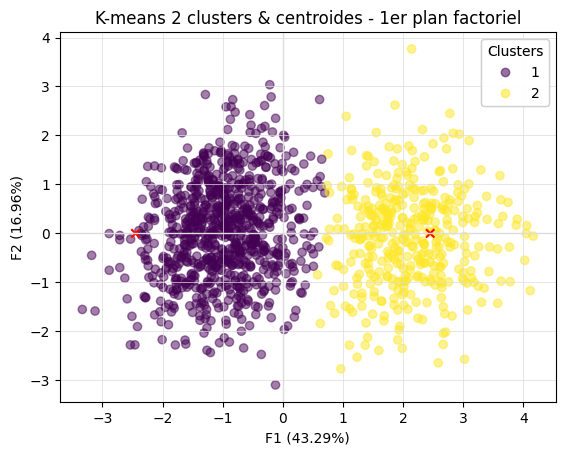

In [123]:
# plot clusters in 1st factorial plane
pca_kmeans = PCA(n_components=2, random_state=42)
pca_kmeans.fit(X_km)

x_proj = pca_kmeans.transform(X_km)
x_proj = pd.DataFrame(x_proj, columns=["PC1", "PC2"])

# use initialised scaler
centroids_km_scaled = std_scaler.fit_transform(centroids_km)

# use initialised acp
centroids_proj = pca_kmeans.fit_transform(centroids_km_scaled)

# create dataframe
centroids_proj = pd.DataFrame(centroids_proj,
                                columns=["F1", "F2"],
                                index=["cluster_0", "cluster_1"])

# plot results
fig, ax = plt.subplots(1, 1)
scatter = ax.scatter(x_proj.iloc[:, 0], x_proj.iloc[:, 1], c=clustering['Cluster_Labels'], cmap='viridis', alpha=0.5)
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1], marker="x",
           c=['red', 'red'])

ax.set_xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0], 2)))
ax.set_ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1], 2)))

# plot thicker abscissa and ordinate lines
plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')

# produce a legend with the unique colors from the scatter
legend_1 = ax.legend(*scatter.legend_elements(),
                     loc="upper right", title="Clusters")
ax.add_artist(legend_1)

ax.set_title("K-means 2 clusters & centroides - 1er plan factoriel")
plt.grid(axis='both', color='gainsboro', lw=0.5)
plt.savefig("Kmeans 2 clusters & centroides - 1er plan factoriel.png", bbox_inches='tight')
plt.show()

- billets vrais = 1

- billets faux = 2

### b) Projection de l'ensemble des billets (1500 billets) sur le 1er plan factoriel

In [124]:
# Import data & split file
data = pd.read_csv("df_final.csv")

print(data.shape)

(1500, 7)


In [125]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


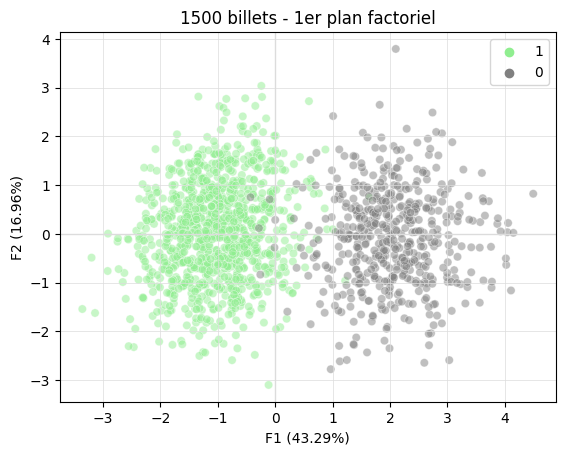

In [127]:
x = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].values

# center & reduce data
std_scaler = StandardScaler()
std_scaler.fit(x)
x_scaled = std_scaler.transform(x)

# run K-means
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)
kmeans_2.fit(x_scaled)

# run PCA
pca_kmeans = PCA(n_components=2, random_state=42)
pca_kmeans.fit(x_scaled)
x_proj = pca_kmeans.transform(x_scaled)

# Plot clusters in 1st factorial plane
x_proj = pd.DataFrame(x_proj, columns=["PC1", "PC2"])
fig, ax = plt.subplots(1, 1)
scatter1 = sns.scatterplot(data=x_proj, x="PC1", y="PC2", hue=data['is_genuine'], palette=['lightgreen','gray'],
                           hue_order=[1, 0], alpha=0.5)
ax.set_xlabel('F{} ({}%)'.format(1, round(100*pca_kmeans.explained_variance_ratio_[0], 2)))
ax.set_ylabel('F{} ({}%)'.format(2, round(100*pca_kmeans.explained_variance_ratio_[1], 2)))

# Plot thicker abscissa and ordinate lines
plt.axvline(x=0, c='gainsboro', lw=1, linestyle='solid')
plt.axhline(y=0, c='gainsboro', lw=1, linestyle='solid')
plt.legend(title='')
ax.set_title("1500 billets - 1er plan factoriel")
plt.grid(axis='both', color='gainsboro', lw=0.5)
plt.savefig("1500_billets.png", bbox_inches='tight')
plt.show()


<font color="lightgreen"> 

### TEST DU MODELE DE DETECTION DE FAUX BILLETS

</font>

In [387]:
# Import data
data = pd.read_csv("billets_production.csv")

# check for missing values
if (data.loc[data.isna().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs manquantes !!!")
else:
    print ("Pas de valeurs manquantes.")
# check for missing data
if (data.loc[data.isnull().any(axis=1) == True].shape[0]) != 0:
    print("!!! Valeurs nulles !!! ")
else:
    print ("Pas de valeurs nulles.")
# check for duplicates
if (data.loc[data.duplicated() == True].shape[0]) != 0:
    print("!!! Doublons dans la table !!!")
else:
    print ("Pas de doublons dans la table.")

Pas de valeurs manquantes.
Pas de valeurs nulles.
Pas de doublons dans la table.


In [388]:
# On enregistre les données d'entrainement dans un dictionnaire

data_train = {}
data_train[0] = std_scaler
data_train[1] = pca
data_train[2] = regression
data_train

{0: StandardScaler(), 1: PCA(n_components=2), 2: LogisticRegression()}

In [389]:
import pickle

file = open('train', 'wb')
pickle.dump(data_train, file)
file.close()

In [390]:
# Import des librairies utiliser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import pickle
import csv

# Programe de detection de faux billets

def detection_billets(fichier_csv):
    
    # Import des données d'entrainement
    file = open('train', 'rb')
    data_train = pickle.load(file)
    file.close()
    std_scaler = data_train[0]
    pca = data_train[1]
    regression = data_train[2]
    
    # Import des données du fichier
    df_final = pd.read_csv(fichier_csv)
    X_csv = df_final.drop(['id'], axis=1) # On ne prend pas l'ID
    X_csv = pd.DataFrame(std_scaler.transform(X_csv)) # Standardisation des données    
    
    
    # Regression logistique
    y_log = regression.predict(X_csv)
    pred = pd.DataFrame(y_log)
    pred = pred.rename(columns={0: 'Prédiction'})
    pred = pred.replace({False: 'Faux billet', True: 'Vrai billet'})
    
    y_proba = regression.predict_proba(X_csv)
    proba = pd.DataFrame(y_proba)
    proba = proba.rename(columns={0: 'Probabilité de faux', 1: 'Probabilité de vrais'})
    
    # Concaténation des données
    prediction = pd.concat([pred, proba], axis = 1)
    res = pd.concat([prediction, data], axis = 1)
    
    # Recherche des billets à revérifier, car probabilité de Vrais ou Faux infèrieur à 90% !
    verif_billet = res.loc[(res['Probabilité de vrais'] > 0.10) & (res['Probabilité de vrais'] < 0.90)]
    
    # Création d'un fichier CSV avec les résultats
    res.to_csv('Resultats_Detections_Billets.csv', index = True)
    
    # Création d'un fichier CSV avec les billets à revérifier si il y en a !
    if(len(verif_billet)>0):
        verif_billet.to_csv('Billets_à_Vérifier.csv', index = True)
    
    return(res)
    

In [391]:
detection_billets("billets_production.csv")

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



,Prédiction,Probabilité de faux,Probabilité de vrais,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,Faux billet,0.997028,0.002972,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,Faux billet,0.999587,0.000413,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,Faux billet,0.999515,0.000485,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,Vrai billet,0.042328,0.957672,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,Vrai billet,0.000186,0.999814,171.65,103.63,103.56,3.77,3.16,113.33,A_5
